# 質的変数を量的変数として扱う

## 割合と平均は同じこと

- ペンギンの種類の割合（全体に対する数）を集計すること
- ペンギンのそれぞれの種類であるだろう度合い（２値）の平均を集計すること

をそれぞれ Python で計算する。

まずは「割合」として

Penguins species ratio (in %):
species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: proportion, dtype: float64


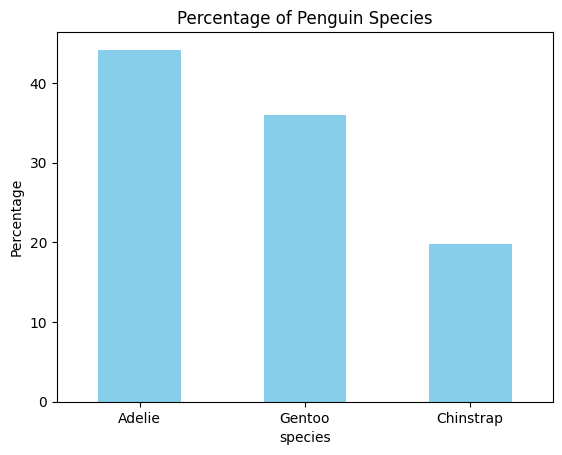

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# seaborn の penguins データセットをロード
df = sns.load_dataset("penguins")

# species 列に欠損値がある場合は除外
df = df.dropna(subset=["species"])

# 各種の出現割合をパーセンテージで算出
species_ratio = df["species"].value_counts(normalize=True) * 100

# 結果の表示
print("Penguins species ratio (in %):")
print(species_ratio)

# オプション: 結果を棒グラフで可視化
species_ratio.plot(kind="bar", color="skyblue")
plt.ylabel("Percentage")
plt.title("Percentage of Penguin Species")
plt.xticks(rotation=0)
plt.show()


この場合、```value_counts(normalize=True)``` 関数が「種類ごとの合計を出して、さらに全体で割って0~1の間の数値として表している。つまり「割合」を計算している。

次に「それぞれの個体が、どの種類に当てはまるか」の平均を計算する。

Penguins species ratio (in %):
Adelie       44.186047
Chinstrap    19.767442
Gentoo       36.046512
dtype: float64


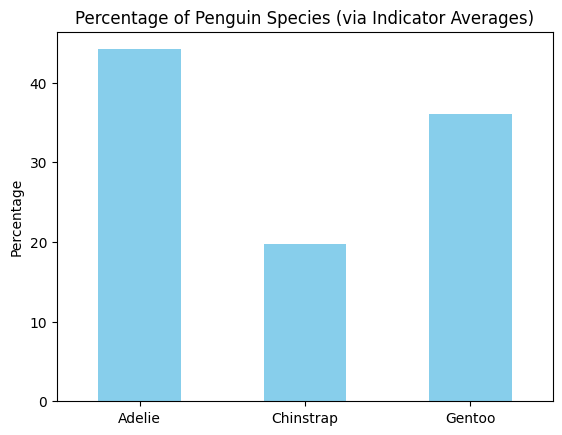

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# seaborn の penguins データセットをロードし、欠損値を除外
df = sns.load_dataset("penguins").dropna(subset=["species"])

# ダミー変数（0,1）の DataFrame を作成
dummies = pd.get_dummies(df["species"])

# 各種の割合は、各列の平均値（1の割合）として計算できる
species_ratio = dummies.mean() * 100

print("Penguins species ratio (in %):")
print(species_ratio)

# オプション: 結果を棒グラフで可視化
species_ratio.plot(kind="bar", color="skyblue")
plt.ylabel("Percentage")
plt.title("Percentage of Penguin Species (via Indicator Averages)")
plt.xticks(rotation=0)
plt.show()


```get_dummies(df["species"])``` 関数は以下のようなカラムを加える。

  | Index | Adelie | Gentoo | Chinstrap |
  |-------|--------|--------|-----------|
  | 0     | 1      | 0      | 0         |
  | 1     | 0      | 1      | 0         |
  | 2     | 1      | 0      | 0         |
  | ...   | ...    | ...    | ...       |

  それぞれの個体がどの種類なのかを、One-hot encodingを用いて、１＝当てはまる、０＝当てはまらないの２値変数で表している。

  ```dummies.mean()``` 変数を使ってそれぞれのカラムの「平均値」を計算する。値は0か1なので、平均は0~1の間になる。

# 平均値を取る様子を示すアニメーション

「平均値」を取る様子をイメージできるように p5.js で簡単なアニメーションを作りました。

ｘ軸にペンギンの個体を並べて、種類ごとに色を変えて、高さが１になるバーを描きます。ｙ軸は0~1ですが、全ての値は１なので「完全に埋まったバーグラフ」に見えます。「左矢印」をクリックすると、それぞれの「平均」が点線で表示されます。

（プレビューのイメージ）
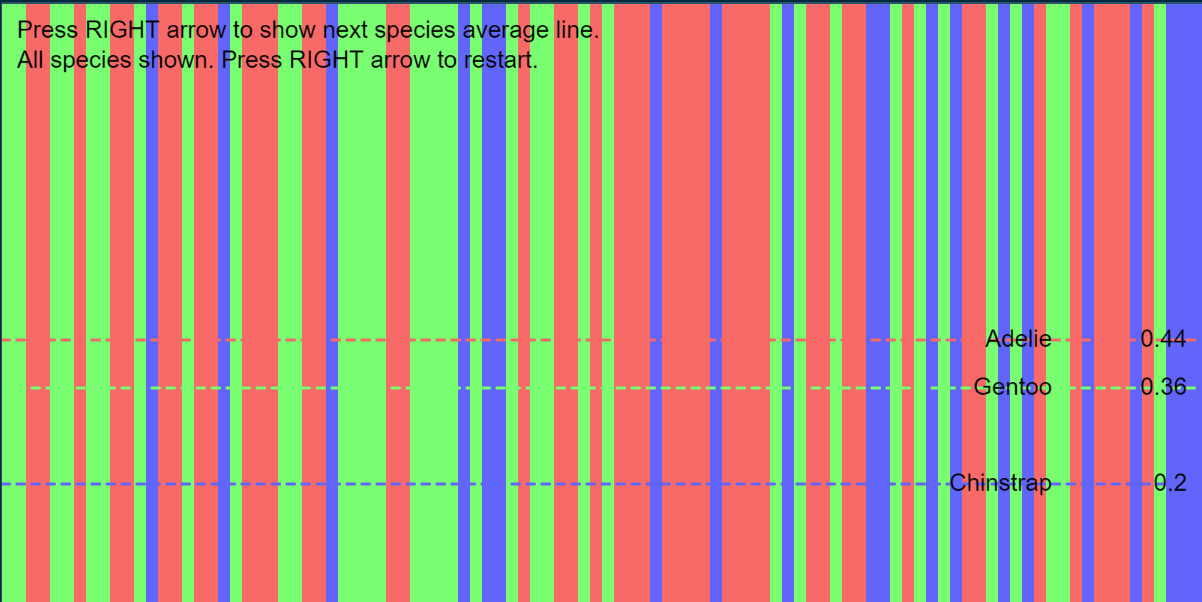

クリックしてアニメーションのページを開く
https://yoshiwatanabe.github.io/python-test/average_of_categorical_data.html

# どう頭の中で整理するか
「割合」を考える時、そのカテゴリのひとつに当てはまるかどうかの度合いの平均値と考えることが出来る。

「Adelieペンギンが全体の44％だ」と言う時「Adelieペンギンに該当するか度合いの平均が0.44だ」と言うことも出来る。

# どう発展できるか

 「質的な特徴の割合」についての集計（男女、地域、行動するかどうかなど）は「平均値」としても表すことが出来るので、平均値を使った処理や演算を用いて「割合」についての集計も可能になる。

 割合と平均を分けて考えるのではなく、平均で統一して考えることが出来る。

